In [37]:
import pylab as pl
import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
s = {
    "lines.linewidth": 2.0,
    "axes.edgecolor": "#bcbcbc",
    "axes.facecolor": "#dddddd",
    "patch.linewidth": 1.0,
    "legend.fancybox": False,
    "font.size" : 18,
    "legend.fontsize" : "medium",
    "axes.labelsize": "large",
    "axes.grid": True,
    "grid.color": "#ffffff",
    "patch.edgecolor": "#ffffff",
    "axes.titlesize": "x-large"
}

In [3]:
pl.rcParams.update(s)

### Create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

In [9]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, error=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if error is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(error)

In [23]:
#define values
x_range = np.arange(10, 110, 10)
y_range = line(0.75, x_range, 0, error=x_range)
y_error = errors(x_range)

Text(0.5,1,'A Scatterplot of X and Y with Errorbars')

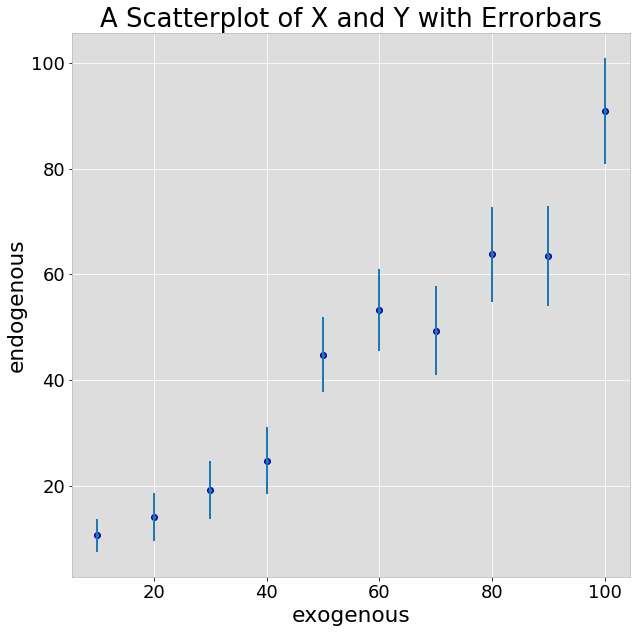

In [24]:
#generate plot
plt.figure(figsize=(10,10))

plt.scatter(x_range, y_range, color='xkcd:royal blue', marker='o')
plt.errorbar(x_range, y_range, yerr=y_error, fmt='.')

plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.title('A Scatterplot of X and Y with Errorbars')
    

### Print y, x, and the result of applying statsmodels.api.add_constant() to x

In [26]:
print(x_range)

[ 10  20  30  40  50  60  70  80  90 100]


In [27]:
print(y_range)

[ 10.65407664  14.12132483  19.16904282  24.76312027  44.82716485
  53.29634426  49.38044576  63.78827868  63.46791036  90.96187451]


In [28]:
print(sm.add_constant(x_range))

[[   1.   10.]
 [   1.   20.]
 [   1.   30.]
 [   1.   40.]
 [   1.   50.]
 [   1.   60.]
 [   1.   70.]
 [   1.   80.]
 [   1.   90.]
 [   1.  100.]]


### Use statsmodels.api.OLS to fit x and y

In [49]:
x_plus_constant = sm.add_constant(x_range)
rightfit = smf.OLS(y_range, x_plus_constant).fit()
rightfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     126.1
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           3.55e-06
Time:                        22:00:40   Log-Likelihood:                -32.144
No. Observations:                  10   AIC:                             68.29
Df Residuals:                       8   BIC:                             68.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -2.3442      4.599     -0.510      0.624       -12.950     8.262
x1             0.8325      0.074     11.231      0.000         0.662     1.003
==============================================================================
Omnibus:                        1.098   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                0.657
Skew:                           0.072   Prob(JB):                        0.720
Kurtosis:                       1.753   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
wrongfit = smf.OLS(y_range, x_range).fit()
wrongfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     590.8
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           1.62e-09
Time:                        21:48:57   Log-Likelihood:                -32.303
No. Observations:                  10   AIC:                             66.61
Df Residuals:                       9   BIC:                             66.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7990      0.033     24.306      0.000         0.725     0.873
==============================================================================
Omnibus:                        0.713   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.640
Skew:                           0.366   Prob(JB):                        0.726
Kurtosis:                       2.000   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Plot the data (as points) and both statsmodels fits

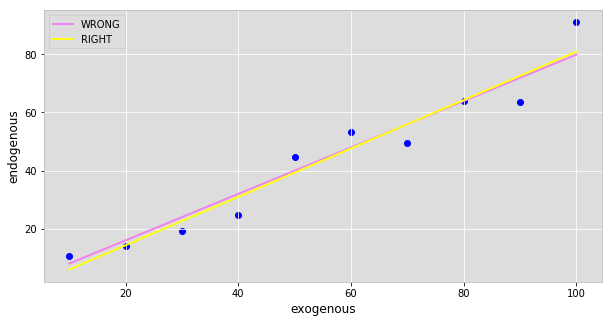

In [52]:
wrongfit_slope = wrongfit.params
rightfit_constant, rightfit_slope = rightfit.params

plt.figure(figsize = (10,5))
plt.scatter(x_range, y_range, c='b')
plt.xlabel("exogenous")
plt.ylabel("endogenous")

plt.plot(x_range, wrongfit_slope * x_range, color = 'violet', label='WRONG')
plt.plot(x_range, rightfit_constant + rightfit_slope * x_range, color = 'xkcd:yellow', label='RIGHT')

plt.legend()
         
plt.show()

Figure showing two fit lines against 10 points generated using the line function.  The line labeled "right" takes into account the y intercept of the line, while the "wrong" line goes through (0,0).

### Create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [53]:
#define values
x_range = np.arange(10, 110, 10)
y_range = line(0.5, x_range, 52, error=x_range)
y_error = errors(x_range)

Text(0.5,1,'A Scatterplot of X and Y with Errorbars')

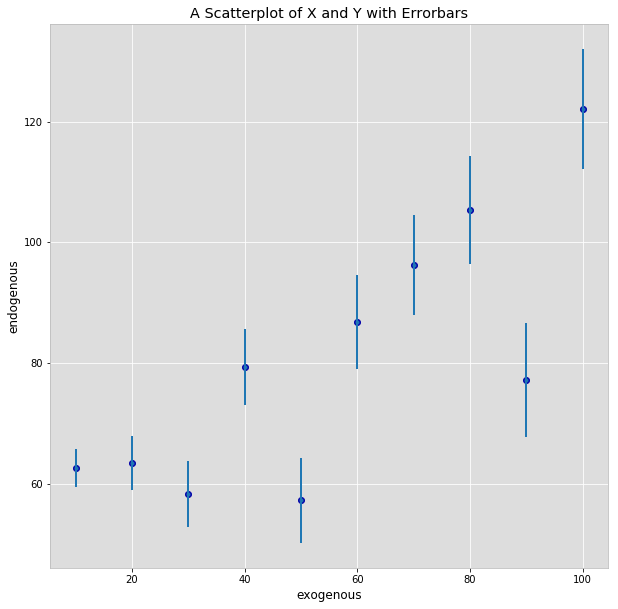

In [55]:
#generate plot
plt.figure(figsize=(10,10))

plt.scatter(x_range, y_range, color='xkcd:royal blue', marker='o')
plt.errorbar(x_range, y_range, yerr=y_error, fmt='.')

plt.xlabel('exogenous')
plt.ylabel('endogenous')
plt.title('A Scatterplot of X and Y with Errorbars')

In [56]:
x_plus_constant = sm.add_constant(x_range)
rightfit = smf.OLS(y_range, x_plus_constant).fit()
rightfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     13.83
Date:                Wed, 14 Nov 2018   Prob (F-statistic):            0.00588
Time:                        22:09:08   Log-Likelihood:                -39.493
No. Observations:                  10   AIC:                             82.99
Df Residuals:                       8   BIC:                             83.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         49.2477      9.591      5.135      0.001        27.130    71.366
x1             0.5749      0.155      3.719      0.006         0.218     0.931
==============================================================================
Omnibus:                        2.266   Durbin-Watson:                   2.814
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.417
Skew:                          -0.863   Prob(JB):                        0.492
Kurtosis:                       2.352   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
wrongfit = smf.OLS(y_range, x_range).fit()
wrongfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     83.59
Date:                Wed, 14 Nov 2018   Prob (F-statistic):           7.50e-06
Time:                        22:09:45   Log-Likelihood:                -46.781
No. Observations:                  10   AIC:                             95.56
Df Residuals:                       9   BIC:                             95.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.2784      0.140      9.143      0.000         0.962     1.595
==============================================================================
Omnibus:                        0.514   Durbin-Watson:                   0.705
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.153
Skew:                          -0.266   Prob(JB):                        0.927
Kurtosis:                       2.711   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

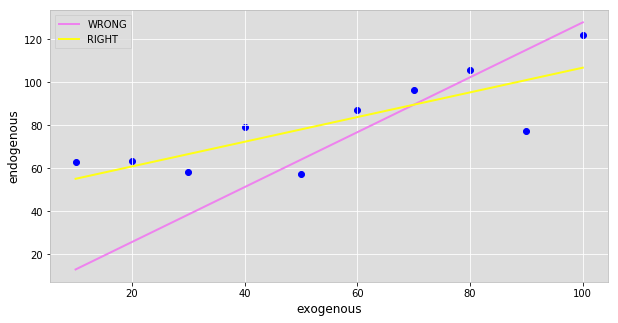

In [58]:
wrongfit_slope = wrongfit.params
rightfit_constant, rightfit_slope = rightfit.params

plt.figure(figsize = (10,5))
plt.scatter(x_range, y_range, c='b')
plt.xlabel("exogenous")
plt.ylabel("endogenous")

plt.plot(x_range, wrongfit_slope * x_range, color = 'violet', label='WRONG')
plt.plot(x_range, rightfit_constant + rightfit_slope * x_range, color = 'xkcd:yellow', label='RIGHT')

plt.legend()
         
plt.show()

Figure showing that when you increase the intercept to be > 100 times the slope, the wrongness of wrong gets very obvious.

#### Now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

In [59]:
x_plus_constant = sm.add_constant(x_range)
rightfit = smf.WLS(y_range, x_plus_constant).fit()
rightfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.634
Model:                            WLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     13.83
Date:                Wed, 14 Nov 2018   Prob (F-statistic):            0.00588
Time:                        22:11:36   Log-Likelihood:                -39.493
No. Observations:                  10   AIC:                             82.99
Df Residuals:                       8   BIC:                             83.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         49.2477      9.591      5.135      0.001        27.130    71.366
x1             0.5749      0.155      3.719      0.006         0.218     0.931
==============================================================================
Omnibus:                        2.266   Durbin-Watson:                   2.814
Prob(Omnibus):                  0.322   Jarque-Bera (JB):                1.417
Skew:                          -0.863   Prob(JB):                        0.492
Kurtosis:                       2.352   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

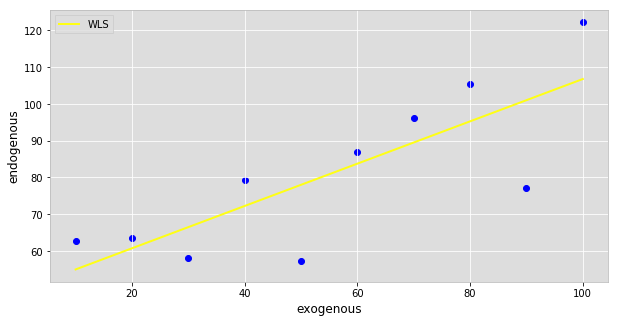

In [60]:
rightfit_constant, rightfit_slope = rightfit.params

plt.figure(figsize = (10,5))
plt.scatter(x_range, y_range, c='b')
plt.xlabel("exogenous")
plt.ylabel("endogenous")

#plt.plot(x_range, wrongfit_slope * x_range, color = 'violet', label='WRONG')
plt.plot(x_range, rightfit_constant + rightfit_slope * x_range, color = 'xkcd:yellow', label='WLS')

plt.legend()
         
plt.show()

Figure showing the weighted least squares fit of a line to a series of points generated with an intercept of 52 and a slope of 0.5.